<a href="https://colab.research.google.com/github/PHDeschamps/ProjetoNPS_CNH/blob/main/Arvore_NPS_CNH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arvore de Decisão dos Neutros

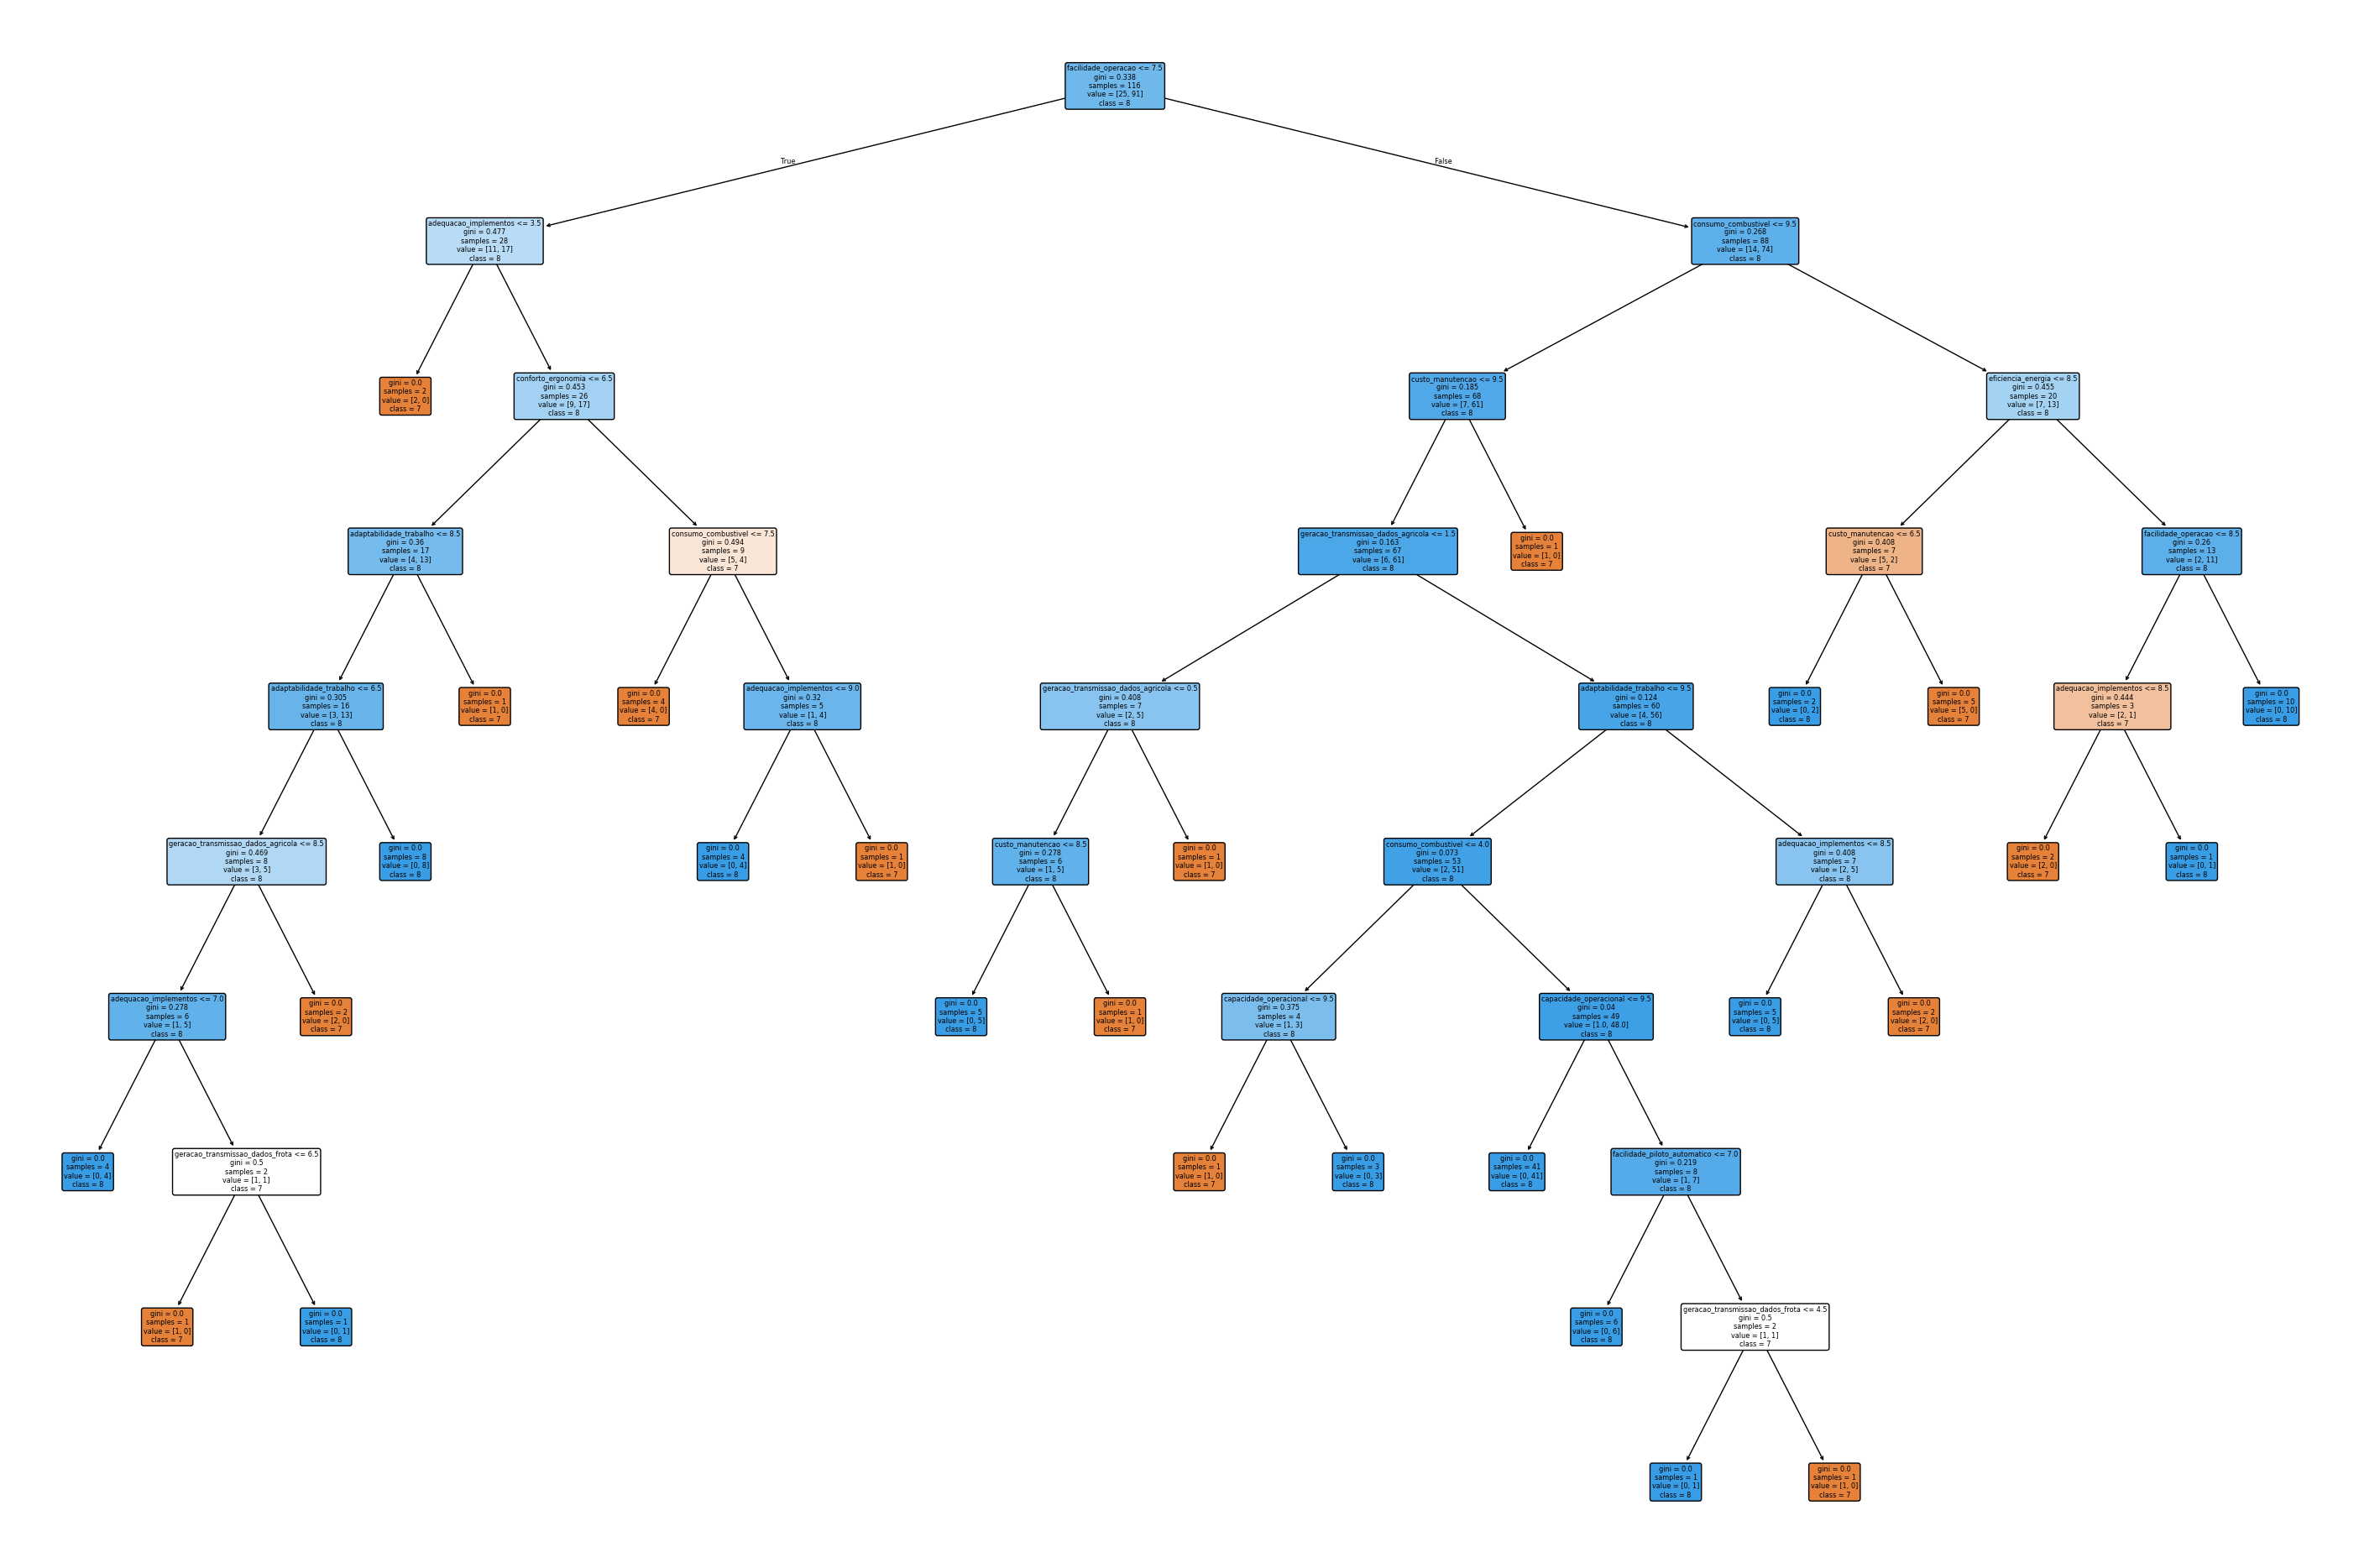

In [29]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Dados fornecidos
facilidade_operacao = [8, 8, 8, 9, 8, 5, 9, 9, 8, 8, 8, 8, 7, 10, 10, 10, 10, 4, 6, 5, 8, 8, 10, 7, 10, 10, 7, 8, 8, 10,
                       8, 10, 10, 9, 9, 9, 8, 7, 9, 7, 9, 7, 7, 8, 5, 8, 6, 10, 9, 8, 8, 8, 8, 10, 8, 6, 7, 5, 7, 10, 9,
                       8, 7, 10, 8, 5, 8, 10, 10, 10, 8, 10, 9, 9, 10, 9, 7, 7, 9, 7, 8, 5, 10, 8, 10, 9, 9, 8, 8, 5, 10,
                       8, 10, 10, 9, 9, 7, 10, 9, 9, 7, 9, 10, 7, 10, 8, 10, 8, 8, 8, 10, 10, 10, 7, 10, 8, 10, 10, 9, 8,
                       7, 5, 8, 8, 9, 7, 7, 5, 9, 7, 8, 9, 7, 7, 8, 10, 6, 7, 8, 8, 10, 7, 8, 10, 10, 8, 9, 10, 9, 7, 10,
                       8, 8, 8, 9, 10, 8, 10, 9, 9, 10, 8, 10, 10, 10, 9, 10, 9, 9, 10, 8, 10, 8, 6, 7, 8, 7, 10, 8, 10, 7,
                       8, 10, 8, 9, 9, 8, 10, 10, 10, 8, 8, 9, 8, 10, 10, 8, 10, 5, 9, 5, 10, 9, 7, 8, 10, 10, 7, 8, 7, 9,
                       7, 8, 8, 10, 8, 10, 8, 8, 8, 8, 10, 7, 10, 10, 9, 10, 5, 8, 10, 10, 10, 9, 10, 8, 10, 10, 10, 10, 10,
                       10, 4, 6, 8, 10, 10, 9, 8, 10, 8, 9, 7, 8, 9, 8, 5, 9, 9, 9, 10, 10, 10, 10, 9, 10, 10, 9, 9, 8, 7,
                       10, 7, 8, 7, 10, 8, 8, 7, 8, 7, 7, 5, 9, 7, 9, 8, 7, 10, 8, 10, 8, 10, 10]
conforto_ergonomia = [7, 8, 9, 9, 8, 5, 7, 6, 6, 8, 6, 8, 8, 9, 7, 8, 5, 2, 6, 1, 7, 6, 10, 3, 8, 9, 8, 7, 5, 10, 9, 8, 4,
                           9, 9, 9, 9, 6, 9, 6, 6, 8, 6, 8, 6, 8, 8, 10, 8, 9, 8, 7, 8, 10, 8, 4, 5, 2, 6, 10, 7, 3, 8, 10, 8,
                           5, 8, 7, 7, 5, 8, 9, 8, 9, 9, 9, 7, 7, 8, 5, 8, 5, 10, 10, 7, 9, 8, 6, 6, 5, 9, 8, 9, 10, 7, 0, 6,
                           9, 9, 7, 7, 8, 7, 7, 0, 7, 10, 5, 8, 8, 8, 8, 10, 6, 10, 7, 10, 9, 10, 8, 7, 5, 6, 4, 5, 6, 2, 8, 7,
                           10, 8, 8, 8, 8, 8, 3, 7, 8, 10, 7, 8, 9, 9, 8, 10, 10, 9, 10, 6, 5, 7, 8, 9, 10, 8, 7, 9, 9, 6, 8, 8,
                           10, 10, 8, 8, 10, 8, 6, 7, 8, 8, 9, 7, 4, 10, 10, 8, 7, 6, 9, 7, 7, 7, 9, 8, 8, 3, 9, 8, 9, 6, 4, 8,
                           9, 8, 10, 5, 9, 10, 9, 9, 8, 8, 10, 8, 7, 6, 8, 8, 5, 7, 8, 10, 6, 5, 7, 7, 8, 6, 10, 5, 8, 8, 8, 10,
                           2, 8, 10, 8, 10, 9, 10, 8, 10, 10, 9, 7, 8, 9, 5, 6, 7, 3, 9, 6, 7, 5, 5, 7, 6, 8]
capacidade_operacional = [8, 8, 7, 8, 8, 5, 8, 9, 8, 8, 5, 8, 7, 7, 8, 9, 8, 8, 3, 1, 8, 8, 10, 8, 7, 8, 8, 10, 8, 10, 10, 8, 5, 9,
                               5, 7, 8, 5, 8, 8, 7, 8, 5, 8, 9, 9, 9, 10, 8, 8, 8, 10, 7, 9, 7, 8, 9, 8, 10, 7, 9, 8, 8, 8, 10, 10,
                               9, 10, 8, 9, 8, 9, 9, 8, 9, 7, 9, 9, 7, 8, 9, 10, 9, 10, 10, 10, 9, 8, 9, 9, 9, 7, 9, 10, 9, 7, 9, 8,
                               9, 9, 9, 10, 7, 9, 9, 10, 10, 10, 9, 7, 7, 8, 8, 8, 7, 8, 10, 8, 10, 9, 10, 10, 10, 7, 10, 7, 9, 9, 9,
                               9, 8, 9, 8, 7, 7, 9, 8, 8, 10, 10, 7, 8, 10, 9, 8, 7, 9, 10, 9, 10, 9, 8, 8, 9, 8, 8, 10, 7, 9, 9, 10,
                               9, 10, 10, 9, 9, 10, 9, 9, 10, 9, 10, 7, 7, 10, 8, 9, 9, 10, 8, 9, 10, 7, 8, 7, 7, 9, 10, 7, 9, 8, 10,
                               7, 7, 8, 8, 8, 9, 8, 9, 10, 10, 7, 9, 10, 7, 9, 9, 9, 7, 9, 10]
eficiencia_energia = [10, 8, 9, 9, 8, 9, 9, 9, 7, 10, 8, 7, 8, 9, 10, 7, 7, 10, 8, 9, 10, 9, 7, 10, 7, 9, 7, 9, 8, 8, 8, 9, 9, 10,
                          7, 8, 8, 9, 10, 8, 7, 7, 7, 10, 7, 7, 9, 7, 8, 8, 10, 8, 9, 7, 8, 8, 7, 8, 8, 8, 7, 9, 9, 7, 8, 9, 9,
                          10, 9, 7, 7, 7, 10, 8, 7, 7, 8, 7, 9, 8, 7, 8, 8, 10, 9, 9, 10, 8, 8, 10, 9, 9, 8, 9, 10, 8, 7, 8, 9,
                          7, 9, 10, 9, 10, 10, 10, 8, 9, 7, 9, 9, 9, 10, 10, 10, 9, 9, 10, 9, 8, 7, 9, 8, 7, 9, 8, 8, 9, 7, 10,
                          9, 10, 10, 9, 7, 9, 9, 8, 10, 10, 7, 9, 8, 8, 8, 7, 9, 7, 9, 9, 9, 9, 7, 8, 9, 7, 10, 9, 8, 7, 8, 8]
custo_manutencao = [5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 3, 4, 2, 5, 6, 9, 5, 6, 7, 8, 9, 5, 10,
                         6, 7, 5, 8, 9, 6, 7, 4, 5, 6, 7, 8, 5, 6, 4, 7, 8, 9, 5, 6, 7, 8, 5, 9, 6, 5, 4, 3, 6, 8, 7,
                         6, 5, 9, 7, 4, 5, 8, 9, 10, 6, 8, 7, 6, 9, 5, 4, 5, 7, 8, 6, 4, 9, 7, 8, 5, 6, 7, 8, 4, 9,
                         6, 8, 9, 7, 5, 4, 8, 6, 7, 5, 6, 9, 4, 7, 5, 8, 6, 7, 5, 9, 8, 10, 6, 8, 7, 9, 5, 6, 4, 7,
                         8, 9, 5, 6, 7, 8, 4, 5, 6, 9, 7, 8, 5, 6, 4, 9, 8, 7, 6, 9, 5, 4, 7, 8, 9, 6, 5, 7, 8, 9,
                         4, 5, 6, 8, 9, 7, 5, 6, 7, 8, 9, 4, 5, 8, 6, 7, 5, 9, 8, 6, 7, 4, 5, 6, 7, 8, 9, 5, 6, 7,
                         8, 9, 5, 6, 4, 7, 8, 9, 5, 6, 7, 8, 4, 5, 6, 9, 7, 8, 5, 6]
consumo_combustivel = [
    9, 7, 10, 9, 7, 9, 8, 9, 8, 5, 6, 9, 7, 10, 5, 10, 8, 5, 10, 5, 8, 7, 6, 9, 5, 10, 8, 3, 10, 10, 9, 9, 7, 10,
    9, 8, 9, 8, 8, 8, 10, 6, 7, 6, 9, 7, 8, 7, 8, 8, 8, 7, 8, 10, 5, 8, 8, 8, 10, 9, 9, 9, 8, 8, 2, 8, 10, 8,
    8, 9, 8, 9, 8, 6, 9, 6, 5, 8, 10, 8, 10, 10, 8, 5, 10, 8, 10, 10, 9, 9, 3, 10, 3, 3, 8, 4, 7, 8, 9, 7, 0,
    9, 8, 8, 10, 8, 8, 9, 7, 7, 10, 10, 10, 10, 8, 7, 9, 9, 5, 3, 8, 8, 3, 9, 8, 8, 10, 7, 8, 9, 8, 9, 8, 7,
    7, 10, 9, 8, 10, 5, 8, 10, 8, 5, 8, 9, 6, 6, 8, 10, 8, 8, 9, 9, 8, 9, 8, 10, 8, 10, 10, 9, 8, 9, 8, 8, 10,
    8, 10, 10, 10, 8, 7, 9, 10, 6, 8, 6, 7, 8, 9, 3, 10, 6, 8, 9, 8, 10, 10, 8, 8, 6, 8, 7, 10, 8, 10, 10, 6,
    8, 8, 8, 9, 10, 1, 10, 9, 8, 8, 3, 7, 8, 9, 9, 10, 9, 8, 8, 8, 10, 9, 10, 8, 9, 10, 8, 10, 10, 8, 10, 10,
    8, 9, 8, 10, 9, 10, 10, 10, 8, 9, 6, 9, 7, 8, 8, 8, 8, 10, 10, 10, 10, 6, 10, 8, 10, 7, 8, 7, 10, 6, 3,
    10, 10, 8, 7, 6, 9, 7, 9, 5, 7, 9, 7, 8, 10, 10, 10, 6, 10, 8
    ]
adequacao_implementos = [
    8, 8, 7, 9, 8, 5, 8, 9, 7, 8, 3, 8, 7, 8, 8, 5, 9, 5, 6, 4, 8, 8, 10, 3, 8, 8, 8, 10, 8, 10, 7, 7, 7, 10,
    5, 8, 7, 2, 8, 8, 9, 9, 6, 8, 7, 8, 8, 7, 9, 8, 9, 9, 8, 10, 8, 5, 7, 5, 7, 8, 8, 8, 4, 7, 1, 8, 9, 8,
    7, 8, 10, 10, 8, 8, 8, 8, 7, 8, 8, 8, 10, 10, 8, 10, 8, 8, 10, 8, 8, 10, 6, 8, 10, 9, 8, 8, 10, 9, 7, 7,
    7, 8, 5, 10, 9, 8, 10, 8, 8, 6, 8, 7, 10, 10, 10, 9, 9, 8, 9, 5, 7, 5, 8, 7, 5, 1, 9, 8, 10, 8, 7, 9, 8,
    10, 8, 7, 8, 7, 10, 7, 8, 9, 10, 5, 5, 9, 9, 9, 8, 8, 7, 6, 5, 8, 8, 8, 8, 7, 10, 8, 9, 10, 10, 9, 10, 10,
    7, 9, 5, 4, 8, 9, 5, 8, 7, 10, 10, 9, 6, 9, 8, 8, 9, 9, 8, 9, 10, 9, 8, 8, 9, 6, 8, 6, 8, 10, 6, 8, 9,
    10, 8, 8, 8, 10, 8, 7, 8, 8, 9, 8, 9, 8, 8, 8, 10, 7, 8, 8, 6, 8, 6, 9, 10, 10, 3, 8, 10, 10, 10, 9, 10, 8,
    10, 9, 9, 10, 10, 9, 7, 8, 8, 10, 9, 8, 10, 7, 6, 8, 7, 7, 8, 0, 9, 8, 10, 8, 7, 10, 10, 10, 10, 5, 8, 8,
    8, 7, 6, 8, 4, 7, 10, 8, 7, 8, 9, 7, 8, 9, 8, 4, 8, 9, 10, 8, 10, 6, 9, 7]
facilidade_piloto_automatico = [
    8, 7, 9, 8, 8, 9, 8, 8, 8, 8, 7, 9, 0, 4, 5, 7, 7, 6, 0, 5, 8, 8, 5, 0, 8, 0, 9, 0, 9, 7, 0, 4, 6, 6, 6, 5,
    0, 7, 8, 10, 7, 1, 0, 0, 8, 8, 6, 0, 7, 10, 0, 0, 0, 8, 7, 6, 8, 10, 10, 10, 0, 6, 7, 0, 0, 8, 9, 8, 8, 7,
    8, 10, 3, 10, 7, 8, 7, 10, 10, 7, 7, 0, 10, 8, 9, 8, 10, 8, 5, 0, 9, 8, 5, 10, 7, 7, 8, 8, 8, 10, 10, 0, 5,
    0, 0, 6, 6, 10, 8, 8, 10, 7, 6, 7, 10, 10]
geracao_transmissao_dados_agricola = [
    8, 7, 8, 8, 6, 6, 9, 7, 8, 6, 8, 7, 9, 0, 4, 6, 8, 7, 8, 0, 7, 8, 8, 7, 0, 0, 9, 6, 8, 8, 6, 9, 7, 8, 8, 1,
    5, 7, 0, 7, 10, 9, 8, 8, 2, 10, 0, 8, 8, 8, 6, 2, 8, 10, 8, 10, 0, 0, 10, 8, 8, 8, 8, 6, 10, 0, 6, 8, 0,
    2, 8, 9, 8, 10, 5, 8, 8, 8, 10, 6, 6, 8, 8, 9, 8, 8, 8, 9, 0, 10, 8, 8, 8, 9, 8, 10, 7, 5, 0, 9, 5, 9, 10,
    8, 8, 8, 10, 10, 0, 8, 7, 0, 0, 9, 8, 7, 7, 8, 9, 8, 10, 9, 6, 8, 8, 8, 8, 7, 8, 8, 10, 9, 10]
adaptabilidade_trabalho = [
    7, 8, 9, 9, 8, 6, 8, 9, 8, 8, 5, 8, 7, 9, 6, 7, 7, 3, 8, 5, 8, 7, 6, 8, 6, 8, 8, 8, 8, 10, 10, 8, 8, 9, 7,
    9, 8, 8, 8, 8, 8, 6, 5, 8, 8, 8, 7, 7, 9, 7, 8, 8, 8, 8, 8, 6, 7, 9, 7, 10, 9, 8, 10, 8, 8, 6, 9, 10, 8,
    7, 8, 9, 9, 9, 8, 8, 8, 8, 9, 7, 10, 5, 8, 10, 10, 8, 7, 8, 8, 8, 10, 8, 8, 8, 8, 10, 8, 9, 9, 7, 6, 8, 8,
    7, 8, 9, 9, 7, 8, 8, 9, 8, 8, 5, 9, 10, 10, 10, 9, 8, 8, 6, 8, 7, 8, 7, 8, 3, 8, 8, 9, 8, 7, 8, 8, 10, 8,
    8, 8, 8, 10, 8, 8, 10, 9, 8, 8, 8, 8, 10, 9, 8, 7, 6, 8, 8, 8, 8, 8, 8, 9, 8, 9, 8, 10, 8, 9, 10, 7, 9, 7,
    8, 7, 9, 9, 8, 8, 10, 8, 9, 9, 9, 7, 8, 9, 8, 8, 9, 6, 9, 8, 8, 8, 10, 8, 9, 8, 9, 7, 10, 9, 8, 8, 6, 9,
    10, 7, 8, 7, 9, 8, 10, 8, 8, 9, 6, 8, 7, 8, 9, 8, 9, 10, 9, 10, 5, 8, 10, 10, 10, 9, 9, 8, 8, 10, 10, 8,
    10, 9, 7, 9, 9, 10, 9, 10, 8, 8, 9, 8, 7, 8, 9, 8, 9, 8, 8, 10, 7, 10, 7, 10, 8, 10, 10, 8, 8, 8, 8, 8,
    6, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 8, 7, 10, 8, 8, 10, 7, 10, 8, 10, 9]
geracao_transmissao_dados_frota = [
    8, 7, 9, 8, 6, 6, 9, 7, 8, 3, 8, 7, 10, 0, 4,
    5, 8, 7, 8, 0, 6, 9, 10, 5, 0, 0, 9, 6, 8, 7, 0,
    5, 8, 7, 8, 8, 1, 5, 6, 0, 10, 8, 10, 7, 1, 10, 0,
    8, 9, 8, 6, 3, 8, 10, 8, 10, 0, 0, 10, 8, 8, 7, 9,
    8, 9, 6, 10, 0, 5, 7, 0, 2, 8, 8, 8, 8, 5, 8, 8,
    8, 4, 7, 7, 8, 8, 9, 7, 5, 8, 0, 10, 8, 8, 8, 9,
    9, 10, 7, 5, 0, 9, 5, 9, 7, 8, 9, 10, 0, 8, 8, 0,
    0, 7, 7, 9, 9, 9, 10, 9, 9, 8, 6, 8, 8, 7, 8, 7,
    7, 8, 10, 10, 8, 10]
nota = [8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8,
        8, 7, 8, 7, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 7,
        7, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 7,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 7, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8,
        8, 7, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 7, 7, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8,
        7, 7, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 7, 7, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8]


# Truncar para o tamanho da lista menor
min_len = min(len(facilidade_operacao), len(nota), len(geracao_transmissao_dados_frota), len(adaptabilidade_trabalho), len(geracao_transmissao_dados_agricola),
              len(facilidade_piloto_automatico), len(adequacao_implementos), len(consumo_combustivel), len(custo_manutencao), len(eficiencia_energia),
              len(capacidade_operacional), len(conforto_ergonomia))
facilidade_operacao = facilidade_operacao[:min_len]
nota = nota[:min_len]
geracao_transmissao_dados_frota = geracao_transmissao_dados_frota[:min_len]
adaptabilidade_trabalho = adaptabilidade_trabalho[:min_len]
geracao_transmissao_dados_agricola = geracao_transmissao_dados_agricola[:min_len]
facilidade_piloto_automatico = facilidade_piloto_automatico[:min_len]
adequacao_implementos = adequacao_implementos[:min_len]
consumo_combustivel = consumo_combustivel[:min_len]
custo_manutencao = custo_manutencao[:min_len]
eficiencia_energia = eficiencia_energia[:min_len]
capacidade_operacional = capacidade_operacional[:min_len]
conforto_ergonomia = conforto_ergonomia[:min_len]

# Organizar os dados em um DataFrame
data = pd.DataFrame({
    'facilidade_operacao': facilidade_operacao,
    'nota': nota,
    'geracao_transmissao_dados_frota': geracao_transmissao_dados_frota,
    'adaptabilidade_trabalho': adaptabilidade_trabalho,
    'geracao_transmissao_dados_agricola': geracao_transmissao_dados_agricola,
    'facilidade_piloto_automatico': facilidade_piloto_automatico,
    'adequacao_implementos': adequacao_implementos,
    'consumo_combustivel': consumo_combustivel,
    'custo_manutencao': custo_manutencao,
    'eficiencia_energia': eficiencia_energia,
    'capacidade_operacional': capacidade_operacional,
    'conforto_ergonomia': conforto_ergonomia
})

# Definir variável alvo (target) e variáveis independentes (features)
X = data[['facilidade_operacao','geracao_transmissao_dados_frota','adaptabilidade_trabalho','geracao_transmissao_dados_agricola',
          'facilidade_piloto_automatico', 'adequacao_implementos', 'consumo_combustivel', 'custo_manutencao', 'eficiencia_energia',
          'capacidade_operacional', 'conforto_ergonomia']]  # Variáveis independentes
y = data['nota']  # Variável dependente (alvo)

# Criar e treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Gerar o gráfico da árvore de decisão
plt.figure(figsize=(36, 24))
tree.plot_tree(clf, filled=True, feature_names=['facilidade_operacao','geracao_transmissao_dados_frota','adaptabilidade_trabalho','geracao_transmissao_dados_agricola',
          'facilidade_piloto_automatico', 'adequacao_implementos', 'consumo_combustivel', 'custo_manutencao', 'eficiencia_energia',
          'capacidade_operacional', 'conforto_ergonomia'], class_names=['7', '8', '9', '10'], rounded=True)
plt.title('')
plt.show()


Arvore de Decisão dos Detratores

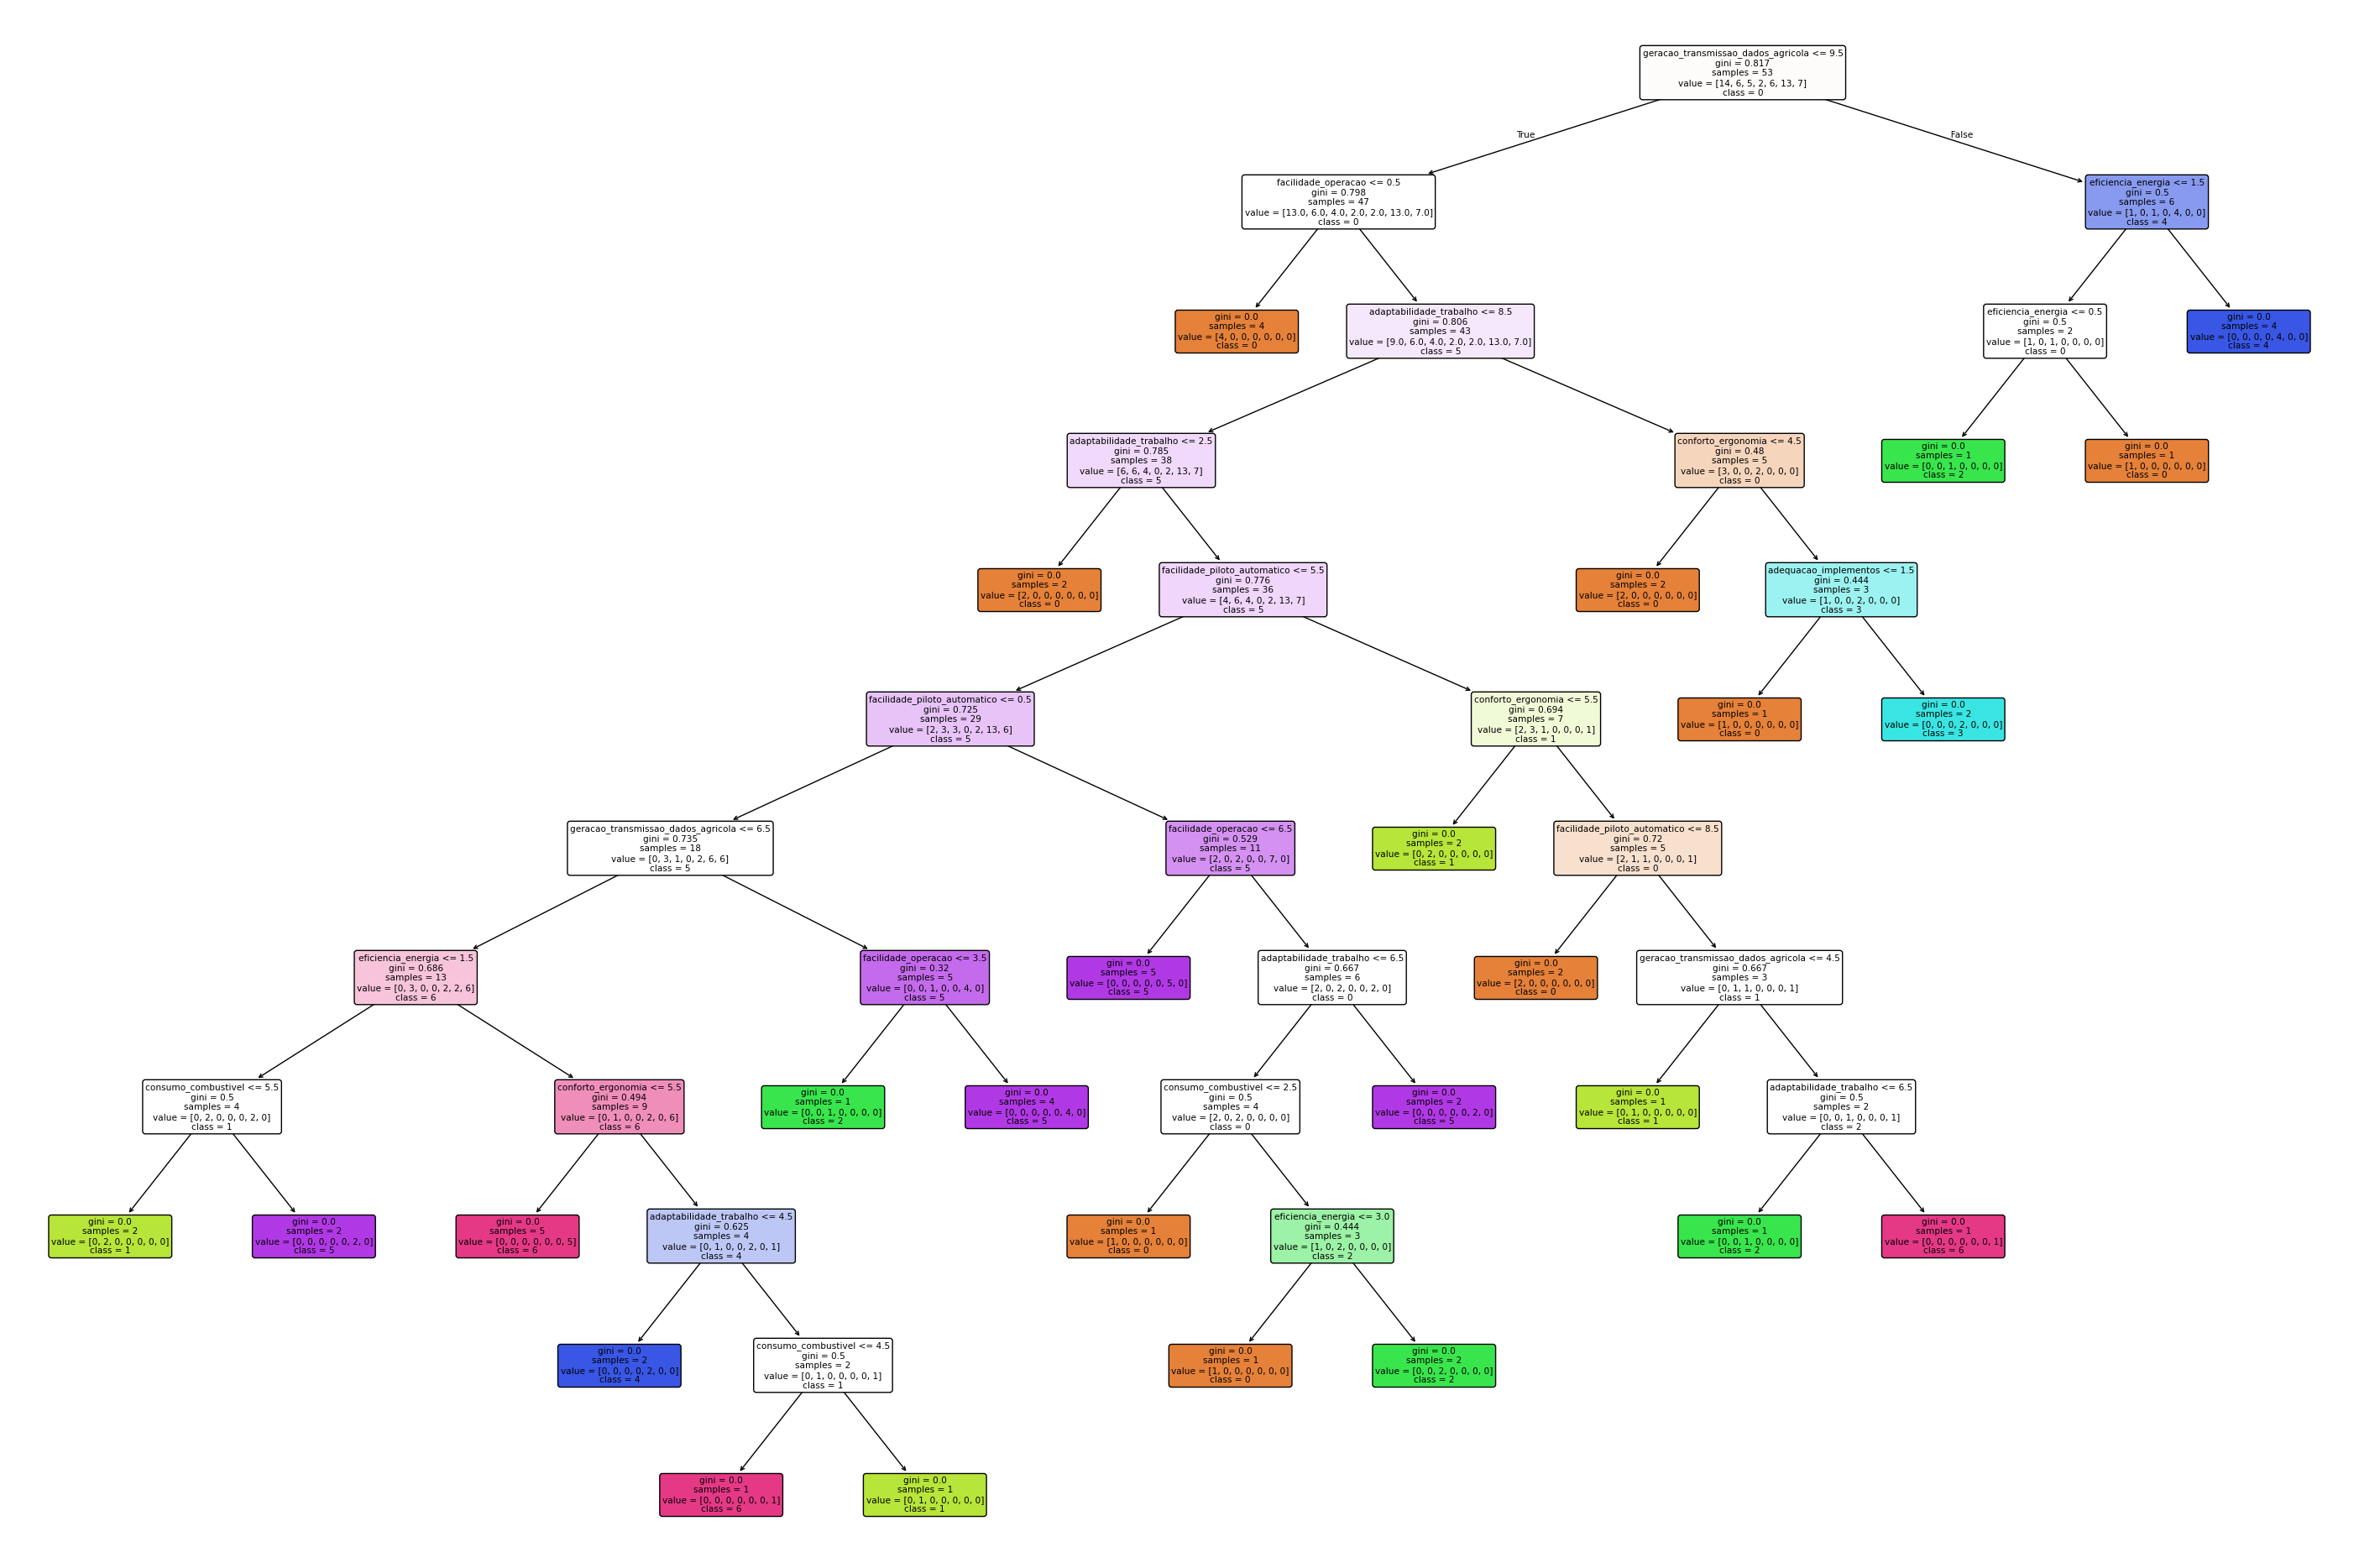

In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Dados fornecidos
facilidade_operacao = [
    10, 5, 6, 10, 5, 4, 7, 7, 10, 4, 5, 2, 10, 8, 2, 8, 0, 5, 10, 8, 5, 0, 6, 7, 2, 5, 4, 5, 5, 8, 5, 0, 9, 0, 2, 7, 5, 6, 7, 7,
    10, 2, 4, 8, 6, 6, 0, 1, 9, 3, 8, 7, 7, 8, 5, 9, 1, 8, 10, 0, 9, 8, 8, 8, 5, 0, 6, 9, 5, 6, 3, 10, 3, 6, 8, 7, 4, 7, 7, 8, 10,
    7, 4, 7, 8, 6, 8, 6, 6, 7, 10, 7, 4, 10, 8, 6, 5, 10, 7, 10, 7, 8, 7, 8, 9, 10, 5, 8, 9, 7, 10, 5, 8, 8, 5, 7, 7, 10, 10, 9, 8
]
conforto_ergonomia = [
    5, 5, 7, 4, 4, 0, 6, 10, 5, 3, 3, 6, 5, 3, 8, 0, 2, 7, 8, 5, 0, 6, 7, 3, 7, 3, 0, 5, 8, 5, 0, 0, 5, 5, 4, 7, 6, 6, 5, 6,
    8, 8, 9, 6, 8, 7, 3, 5, 9, 5, 6, 6, 3, 9, 8, 9, 5, 8, 9, 7, 7, 9, 6, 5, 8, 7, 6, 9, 9, 6, 6, 9, 8, 5, 6, 7, 6, 7, 8, 9, 5, 7, 9
]
capacidade_operacional = [
2, 7, 5, 7, 6, 7, 6, 6, 0, 2, 8, 2, 5, 7, 0, 5, 1, 10, 5, 0, 2, 8, 2, 6, 5, 8, 3, 3, 1, 3, 5, 2, 5, 5, 9, 7, 5, 2, 2, 6, 7, 0, 1, 3,
4, 9, 7, 3, 5, 1, 6, 7, 10, 0, 0, 1, 5, 6, 9, 5, 7, 5, 5, 8, 5, 7, 7, 7, 2, 4, 4, 4, 1, 5, 6, 7, 4, 3, 8, 0, 7, 0, 1, 6, 2, 8, 8, 7,
8, 6, 3, 0, 5, 9, 7, 8, 3, 3, 0, 7, 4, 6, 6, 9, 10, 8, 2, 6, 5, 4, 5, 5, 5, 0, 7, 10, 8, 8, 8, 7, 0, 8, 7, 5, 7, 6, 9, 7, 6, 9, 8,
9, 8, 10, 8, 10, 5, 7, 9, 5, 5, 8, 6, 8, 1, 6, 5, 7, 6
]
eficiencia_energia = [
    3, 4, 3, 2, 5, 2, 0, 7, 0, 5, 5, 8, 5, 0, 1, 0, 2, 5, 8, 5, 0, 5, 3, 0, 5, 0, 0, 5, 1, 3, 0, 3, 6, 5, 2, 6, 4, 5, 4, 2,
    7, 2, 7, 3, 5, 2, 5, 7, 0, 6, 6, 1, 6, 9, 5, 7, 8, 4, 8, 6, 0, 6, 6, 3, 6, 4, 3, 6, 8, 4, 7, 3, 5, 7, 8, 7, 3, 4, 8, 2, 6, 9, 9
]
custo_manutencao = [
    5, 1, 3, 2, 0, 0, 6, 0, 3, 6, 9, 5, 1, 1, 0, 0, 0, 9, 5, 0, 3, 6, 0, 5, 0, 0, 5, 7, 6, 0, 0, 6, 9, 5, 5, 4, 7, 4, 0,
    0, 7, 7, 6, 1, 7, 5, 6, 0, 9, 7, 6, 2, 7, 7, 8, 1, 8, 7, 6, 0, 9, 3, 9, 9, 3, 4, 5, 7, 4, 7, 6, 0, 6, 3, 4, 6, 9, 8, 6, 8, 6, 6
]
consumo_combustivel = [
    8, 5, 5, 4, 6, 6, 6, 0, 3, 8, 9, 4, 10, 8, 8, 0, 5, 7, 9, 5, 0, 8, 7, 3, 8, 7, 3, 5, 9, 5, 0, 9, 2, 6, 4, 3, 6, 5, 7, 4,
    10, 4, 8, 6, 4, 9, 4, 10, 2, 8, 8, 6, 4, 7, 6, 8, 9, 8, 8, 5, 0, 9, 9, 8, 7, 8, 6, 8, 8, 6, 9, 7, 6, 8, 8, 7, 7, 8, 7, 10, 8, 9
]
adequacao_implementos = [
3, 9, 6, 10, 7, 6, 2, 7, 0, 4, 7, 2, 4, 7, 0, 5, 1, 10, 5, 0, 4, 8, 2, 5, 3, 5, 5, 7, 1, 5, 5, 2, 8, 5, 9, 7, 5, 2, 2, 5, 7, 0, 1, 2,
5, 9, 7, 5, 5, 1, 5, 7, 10, 0, 0, 0, 5, 5, 8, 5, 7, 5, 5, 5, 5, 7, 7, 8, 4, 4, 7, 4, 1, 5, 4, 5, 5, 3, 8, 0, 7, 2, 1, 6, 8, 7, 7, 8,
8, 6, 5, 0, 5, 5, 8, 8, 3, 3, 0, 8, 4, 5, 6, 9, 10, 8, 2, 6, 5, 4, 5, 5, 5, 0, 7, 10, 7, 8, 8, 7, 0, 8, 7, 5, 7, 6, 9, 7, 6, 9, 8,
9, 8, 10, 8, 10, 5, 7, 9, 5, 5, 8, 6, 8, 1, 6, 5, 7, 6
]
facilidade_piloto_automatico = [
    0, 0, 0, 0, 0, 1, 5, 0, 1, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 5, 0, 4, 3,
    0, 0, 0, 1, 0, 0, 6, 0, 1, 5, 0, 1, 10, 0, 0, 6, 3, 1, 6, 7, 10, 0, 8, 6, 0, 5, 1,
    1, 6, 3, 0, 6, 0, 10, 7, 5, 6, 0, 1, 0
]
geracao_transmissao_dados_agricola = [
    0, 5, 0, 0, 2, 9, 3, 0, 0, 0, 0, 5, 9, 0, 0, 5, 6, 1,
    7, 5, 6, 7, 1, 1, 9, 9, 6, 5, 3, 10,
    8, 10, 8, 6, 6, 9, 9, 7, 10, 9, 9, 10, 9, 8, 9, 6, 7, 9,  10, 6, 5, 10, 8
]
adaptabilidade_trabalho = [
    9, 7, 4, 10, 7, 5, 6, 7, 0, 4, 6, 4, 3, 7, 7, 7, 0, 2, 6, 9, 5, 0, 6, 7, 3, 7, 3, 6, 5, 0, 9, 3, 3, 5, 4, 6, 6, 6, 5,
    10, 7, 7, 7, 7, 7, 5, 8, 6, 9, 8, 6, 4, 8, 8, 8, 7, 9, 8, 5, 0, 8, 9, 8, 8, 9, 6, 7, 7, 6, 7, 7, 8, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9
]
geracao_transmissao_dados_frota = [
    0, 6, 0, 0, 3, 5, 9, 3, 0, 0, 0, 0, 5, 9, 0, 0, 5, 6, 0, 0, 5, 5,
    4, 0, 0, 3, 4, 9, 3, 0, 5, 0, 6, 3, 3, 9, 9, 7, 10, 8, 6, 6, 9, 9,
    0, 8, 10, 9, 8, 8, 8, 7, 6, 9, 6, 9, 5, 7, 10, 8, 10, 5, 9, 5
]
nota = [3, 6, 4, 0, 6, 5, 0, 6, 0, 6, 6, 4, 5, 5, 1, 1, 0, 0, 5, 0, 5, 0, 5, 5, 2, 5, 1, 5, 5, 4, 0, 4, 0, 0, 6, 2, 2, 5, 4, 3, 5, 4, 0,
        0, 6, 1, 0, 1, 2, 5, 2, 0, 1, 1, 0, 0, 4, 0, 0, 0, 1, 0, 5, 0, 5, 5, 5, 5, 6, 6, 6, 5, 5, 0, 0, 5, 3, 1, 2, 2, 6, 4, 0, 6, 0, 6,
        0, 0, 4, 2, 0, 5, 5, 6, 5, 3, 0, 5, 6, 5, 0, 0, 5, 3, 0, 5, 6, 6, 6, 6, 5, 3, 1, 6, 6, 3, 5, 2, 6, 5, 1, 5, 5, 6, 5, 5, 5, 5, 0,
        2, 5, 4, 3, 6, 0, 0, 3, 6, 6, 6, 5, 5, 0, 1, 5, 5, 5, 2, 0, 4, 1, 6, 5, 5, 1, 3, 0, 5, 3, 6, 0, 3, 5, 6, 5, 0, 0, 5, 4, 0, 1, 2,
        0, 4, 0, 5, 1, 0, 2, 6, 0, 4, 5, 4, 0, 6, 4, 4, 1, 5, 4, 0, 5, 3, 0, 4, 6, 5, 5, 6, 1, 1, 5, 4, 6, 6]


# Truncar para o tamanho da lista menor
min_len = min(len(facilidade_operacao), len(nota), len(geracao_transmissao_dados_frota), len(adaptabilidade_trabalho), len(geracao_transmissao_dados_agricola),
              len(facilidade_piloto_automatico), len(adequacao_implementos), len(consumo_combustivel), len(custo_manutencao), len(eficiencia_energia),
              len(capacidade_operacional), len(conforto_ergonomia))
facilidade_operacao = facilidade_operacao[:min_len]
nota = nota[:min_len]
geracao_transmissao_dados_frota = geracao_transmissao_dados_frota[:min_len]
adaptabilidade_trabalho = adaptabilidade_trabalho[:min_len]
geracao_transmissao_dados_agricola = geracao_transmissao_dados_agricola[:min_len]
facilidade_piloto_automatico = facilidade_piloto_automatico[:min_len]
adequacao_implementos = adequacao_implementos[:min_len]
consumo_combustivel = consumo_combustivel[:min_len]
custo_manutencao = custo_manutencao[:min_len]
eficiencia_energia = eficiencia_energia[:min_len]
capacidade_operacional = capacidade_operacional[:min_len]
conforto_ergonomia = conforto_ergonomia[:min_len]

# Organizar os dados em um DataFrame
data = pd.DataFrame({
    'facilidade_operacao': facilidade_operacao,
    'nota': nota,
    'geracao_transmissao_dados_frota': geracao_transmissao_dados_frota,
    'adaptabilidade_trabalho': adaptabilidade_trabalho,
    'geracao_transmissao_dados_agricola': geracao_transmissao_dados_agricola,
    'facilidade_piloto_automatico': facilidade_piloto_automatico,
    'adequacao_implementos': adequacao_implementos,
    'consumo_combustivel': consumo_combustivel,
    'custo_manutencao': custo_manutencao,
    'eficiencia_energia': eficiencia_energia,
    'capacidade_operacional': capacidade_operacional,
    'conforto_ergonomia': conforto_ergonomia
})

# Definir variável alvo (target) e variáveis independentes (features)
X = data[['facilidade_operacao','geracao_transmissao_dados_frota','adaptabilidade_trabalho','geracao_transmissao_dados_agricola',
          'facilidade_piloto_automatico', 'adequacao_implementos', 'consumo_combustivel', 'custo_manutencao', 'eficiencia_energia',
          'capacidade_operacional', 'conforto_ergonomia']]  # Variáveis independentes
y = data['nota']  # Variável dependente (alvo)

# Criar e treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Gerar o gráfico da árvore de decisão
plt.figure(figsize=(36, 24))
tree.plot_tree(clf, filled=True, feature_names=['facilidade_operacao','geracao_transmissao_dados_frota','adaptabilidade_trabalho','geracao_transmissao_dados_agricola',
          'facilidade_piloto_automatico', 'adequacao_implementos', 'consumo_combustivel', 'custo_manutencao', 'eficiencia_energia',
          'capacidade_operacional', 'conforto_ergonomia'], class_names=['0', '1', '2', '3', '4', '5', '6'], rounded=True)
plt.title('')
plt.show()
